In [1]:
import numpy as np
np.__version__

'1.20.3'

In [2]:
import pandas as pd
pd.__version__

'1.2.4'

In [3]:
import matplotlib
matplotlib.__version__

'3.4.2'

In [4]:
import matplotlib.pyplot as plt

In [5]:
# Adjust plot size
#options(repr.plot.width=16, repr.plot.height=6)

# For some reason, if this is in the same cell as the import command, it doesn't work.
plt.rcParams["figure.figsize"] = [18.0,8.0]

In [6]:
import scipy
scipy.__version__

'1.6.3'

In [7]:
from scipy import stats

In [8]:
import seaborn as sns
sns.__version__

'0.11.1'

In [9]:
from datetime import datetime

In [10]:
default_max_columns=pd.get_option('display.max_columns')

In [11]:
default_max_rows=pd.get_option('display.max_rows')

In [12]:
default_precision=pd.get_option('display.precision')

In [13]:
pd.set_option('display.precision', 2)

In [14]:
#default_threshold=np.get_printoptions()['threshold']

In [15]:
#np.set_printoptions(threshold=10000000)

---

In [16]:
df=pd.read_csv("20210519-20210428-EV/mrna_counts.csv.gz",index_col=[0])
df.head()

Trim column names

In [18]:
df.columns=df.columns.str.split('.').str[0:2].str.join('.')
df.head()

In [20]:
df.drop(df.columns[df.columns.str.contains('1$')],axis='columns',inplace=True)
df.drop(df.columns[df.columns.str.contains('3$')],axis='columns',inplace=True)
df.head()

SFHH005aa.bbduk2  SFHH005aa.cutadapt2  SFHH005ab.bbduk2  \
sequence                                                               
NM_000014.6                 0                    0                 6   
NM_000015.3                 0                    0                 0   
NM_000016.6                 0                    0                 0   
NM_000020.3                 0                    0                 0   
NM_000021.4                 0                    0                 1   

             SFHH005a.bbduk2  SFHH005ab.cutadapt2  SFHH005ac.bbduk2  \
sequence                                                              
NM_000014.6                0                    8                 0   
NM_000015.3                0                    0                 0   
NM_000016.6                0                    0                 0   
NM_000020.3                1                    0                 1   
NM_000021.4                1                    1                10   

             SFHH005ac.cutadapt2  SFHH005a.cutadapt2  SFHH005ad.bbduk2  \
sequence                                                                 
NM_000014.6                    0                   0                 0   
NM_000015.3                    0                   0                 0   
NM_000016.6                    0                   0                 0   
NM_000020.3                    0                   0                 0   
NM_000021.4                   10                   1                 1   

             SFHH005ad.cutadapt2  ...  SFHH006v.bbduk2  SFHH006v.cutadapt2  \
sequence                          ...                                        
NM_000014.6                    0  ...                0                   0   
NM_000015.3                    0  ...                0                   0   
NM_000016.6                    0  ...                0                   0   
NM_000020.3                    0  ...                0                   0   
NM_000021.4                    1  ...                0                   0   

             SFHH006w.bbduk2  SFHH006w.cutadapt2  SFHH006x.bbduk2  \
sequence                                                            
NM_000014.6                0                   0                0   
NM_000015.3                0                   0                0   
NM_000016.6                0                   0                0   
NM_000020.3                0                   0                0   
NM_000021.4                0                   0                0   

             SFHH006x.cutadapt2  SFHH006y.bbduk2  SFHH006y.cutadapt2  \
sequence                                                               
NM_000014.6                   0                0                   0   
NM_000015.3                   0                0                   0   
NM_000016.6                   0                0                   0   
NM_000020.3                   0                0                   0   
NM_000021.4                   0                0                   0   

             SFHH006z.bbduk2  SFHH006z.cutadapt2  
sequence                                          
NM_000014.6                0                   0  
NM_000015.3                0                   0  
NM_000016.6                0                   0  
NM_000020.3                0                   0  
NM_000021.4                0                   0  

[5 rows x 176 columns]

In [37]:
t2g=pd.read_csv("20210519-20210428-EV/human.rna.table",sep=" ",
                names=['transcript','gene'],
                header=None)
t2g.head()

transcript     gene
0  NM_001368885.1  COL13A1
1  NM_001368886.1  COL13A1
2     NR_148047.2    TACC1
3     NR_148053.2    TACC1
4  NM_001374457.1  SMARCA4

In [46]:
AHDC1=t2g[t2g['gene']=='AHDC1'][['transcript']]
AHDC1

transcript
50565   XM_005245848.3
50566   XM_005245851.3
50567   XM_011541255.1
50568   XM_005245850.3
50569   XM_005245849.3
50570   XM_011541256.2
50571   XM_011541257.2
50572      XR_946609.2
50573   XM_005245852.3
50574   XM_024446461.1
139884  NM_001029882.3
152258  NM_001371928.1

In [47]:
df[df.index.isin(AHDC1['transcript'])].sum(axis='columns')

sequence
NM_001029882.3    27
NM_001371928.1    15
XM_005245848.3    20
XM_005245849.3    26
XM_005245850.3    20
XM_005245851.3    21
XM_005245852.3    33
XM_011541255.1    24
XM_011541256.2    23
XM_011541257.2    39
XM_024446461.1    23
XR_946609.2       20
dtype: int64

Nothing astounding

In [48]:
NAALADL2=t2g[t2g['gene']=='NAALADL2'][['transcript']]
NAALADL2

transcript
102277  XM_011512612.3
102278  XM_011512613.2
102279  XM_017006070.2
102280  XM_017006071.2
102281  XM_017006072.2
102282  XM_017006073.2
102283  XM_017006074.2
102284  XM_017006075.2
102285  XM_017006076.2
102286  XM_017006077.2
102287  XM_017006078.2
102288  XM_006713560.3
102289  XM_017006079.2
102290  XM_017006080.2
102291  XM_011512615.3
102292  XM_017006081.2
102293  XM_017006082.2
102294  XM_011512616.3
102295  XM_011512617.3
102296  XM_017006083.2
140205     NM_207015.3

In [49]:
df[df.index.isin(NAALADL2['transcript'])].sum(axis='columns')

sequence
NM_207015.3        17
XM_006713560.3     24
XM_011512612.3    100
XM_011512613.2     15
XM_011512615.3     73
XM_011512616.3     30
XM_011512617.3     73
XM_017006070.2     27
XM_017006071.2     22
XM_017006072.2     13
XM_017006073.2     24
XM_017006074.2     67
XM_017006075.2     22
XM_017006076.2     24
XM_017006077.2     16
XM_017006078.2     13
XM_017006079.2     62
XM_017006080.2     13
XM_017006081.2     69
XM_017006082.2     13
XM_017006083.2     32
dtype: int64

Nothing super there either, but let's look at 'XM_011512612.3'

In [50]:
df[df.index == 'XM_011512612.3'] > 0

SFHH005aa.bbduk2  SFHH005aa.cutadapt2  SFHH005ab.bbduk2  \
sequence                                                                  
XM_011512612.3             False                False              True   

                SFHH005a.bbduk2  SFHH005ab.cutadapt2  SFHH005ac.bbduk2  \
sequence                                                                 
XM_011512612.3             True                False              True   

                SFHH005ac.cutadapt2  SFHH005a.cutadapt2  SFHH005ad.bbduk2  \
sequence                                                                    
XM_011512612.3                 True                True             False   

                SFHH005ad.cutadapt2  ...  SFHH006v.bbduk2  SFHH006v.cutadapt2  \
sequence                             ...                                        
XM_011512612.3                False  ...            False               False   

                SFHH006w.bbduk2  SFHH006w.cutadapt2  SFHH006x.bbduk2  \
sequence                                                               
XM_011512612.3            False               False            False   

                SFHH006x.cutadapt2  SFHH006y.bbduk2  SFHH006y.cutadapt2  \
sequence                                                                  
XM_011512612.3               False            False               False   

                SFHH006z.bbduk2  SFHH006z.cutadapt2  
sequence                                             
XM_011512612.3            False               False  

[1 rows x 176 columns]

In [51]:
df.columns[df.loc['XM_011512612.3'] >0]

Index(['SFHH005ab.bbduk2', 'SFHH005a.bbduk2', 'SFHH005ac.bbduk2',
       'SFHH005ac.cutadapt2', 'SFHH005a.cutadapt2', 'SFHH005af.bbduk2',
       'SFHH005af.cutadapt2', 'SFHH005aj.bbduk2', 'SFHH005aj.cutadapt2',
       'SFHH005ak.bbduk2', 'SFHH005ak.cutadapt2', 'SFHH005al.bbduk2',
       'SFHH005al.cutadapt2', 'SFHH005am.bbduk2', 'SFHH005ao.bbduk2',
       'SFHH005ar.bbduk2', 'SFHH005c.bbduk2', 'SFHH005c.cutadapt2',
       'SFHH005e.bbduk2', 'SFHH005e.cutadapt2', 'SFHH005f.bbduk2',
       'SFHH005f.cutadapt2', 'SFHH005g.bbduk2', 'SFHH005g.cutadapt2',
       'SFHH005i.bbduk2', 'SFHH005i.cutadapt2', 'SFHH005m.bbduk2',
       'SFHH005m.cutadapt2', 'SFHH005p.bbduk2', 'SFHH005p.cutadapt2',
       'SFHH005v.bbduk2', 'SFHH005v.cutadapt2', 'SFHH005w.bbduk2',
       'SFHH005w.cutadapt2'],
      dtype='object')

In [52]:
df.loc['XM_011512612.3',df.columns[df.loc['XM_011512612.3'] >0]]

SFHH005ab.bbduk2       1
SFHH005a.bbduk2        7
SFHH005ac.bbduk2       2
SFHH005ac.cutadapt2    2
SFHH005a.cutadapt2     8
SFHH005af.bbduk2       3
SFHH005af.cutadapt2    3
SFHH005aj.bbduk2       2
SFHH005aj.cutadapt2    2
SFHH005ak.bbduk2       1
SFHH005ak.cutadapt2    1
SFHH005al.bbduk2       3
SFHH005al.cutadapt2    3
SFHH005am.bbduk2       2
SFHH005ao.bbduk2       1
SFHH005ar.bbduk2       1
SFHH005c.bbduk2        2
SFHH005c.cutadapt2     2
SFHH005e.bbduk2        2
SFHH005e.cutadapt2     2
SFHH005f.bbduk2        3
SFHH005f.cutadapt2     3
SFHH005g.bbduk2        7
SFHH005g.cutadapt2     5
SFHH005i.bbduk2        1
SFHH005i.cutadapt2     1
SFHH005m.bbduk2        1
SFHH005m.cutadapt2     1
SFHH005p.bbduk2        4
SFHH005p.cutadapt2     4
SFHH005v.bbduk2        1
SFHH005v.cutadapt2     1
SFHH005w.bbduk2        9
SFHH005w.cutadapt2     9
Name: XM_011512612.3, dtype: int64

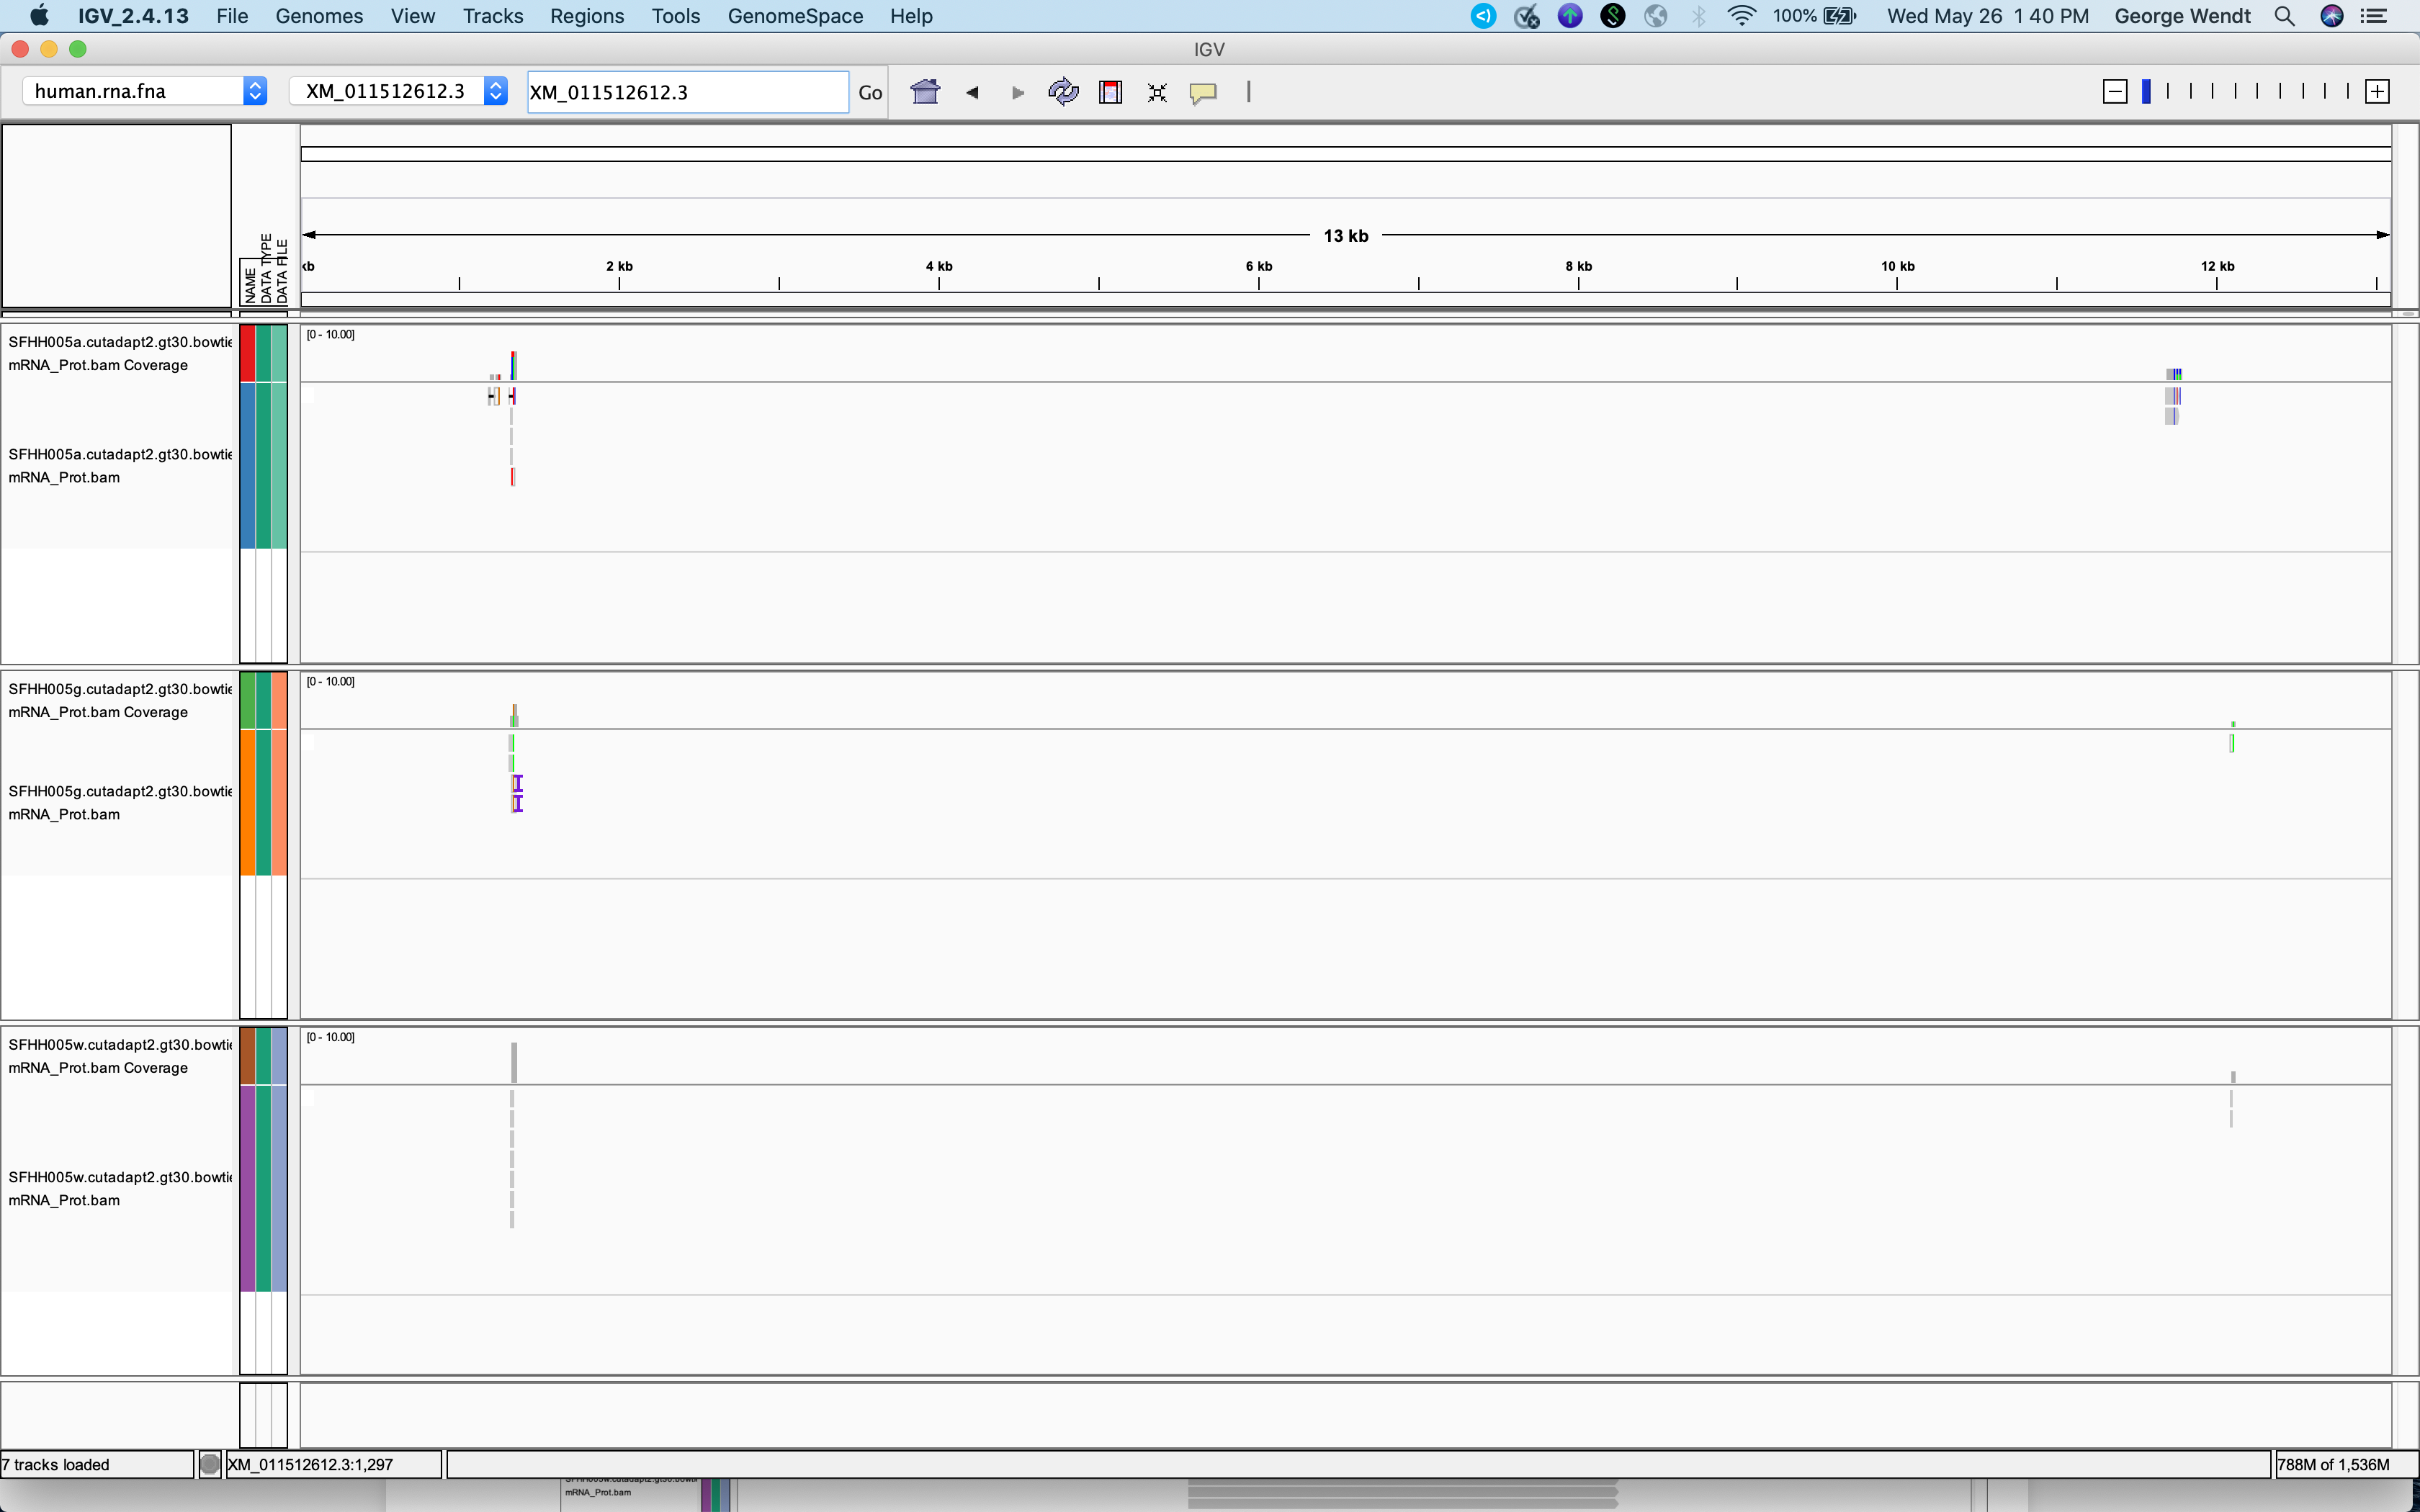

Only in that one spot. Real?

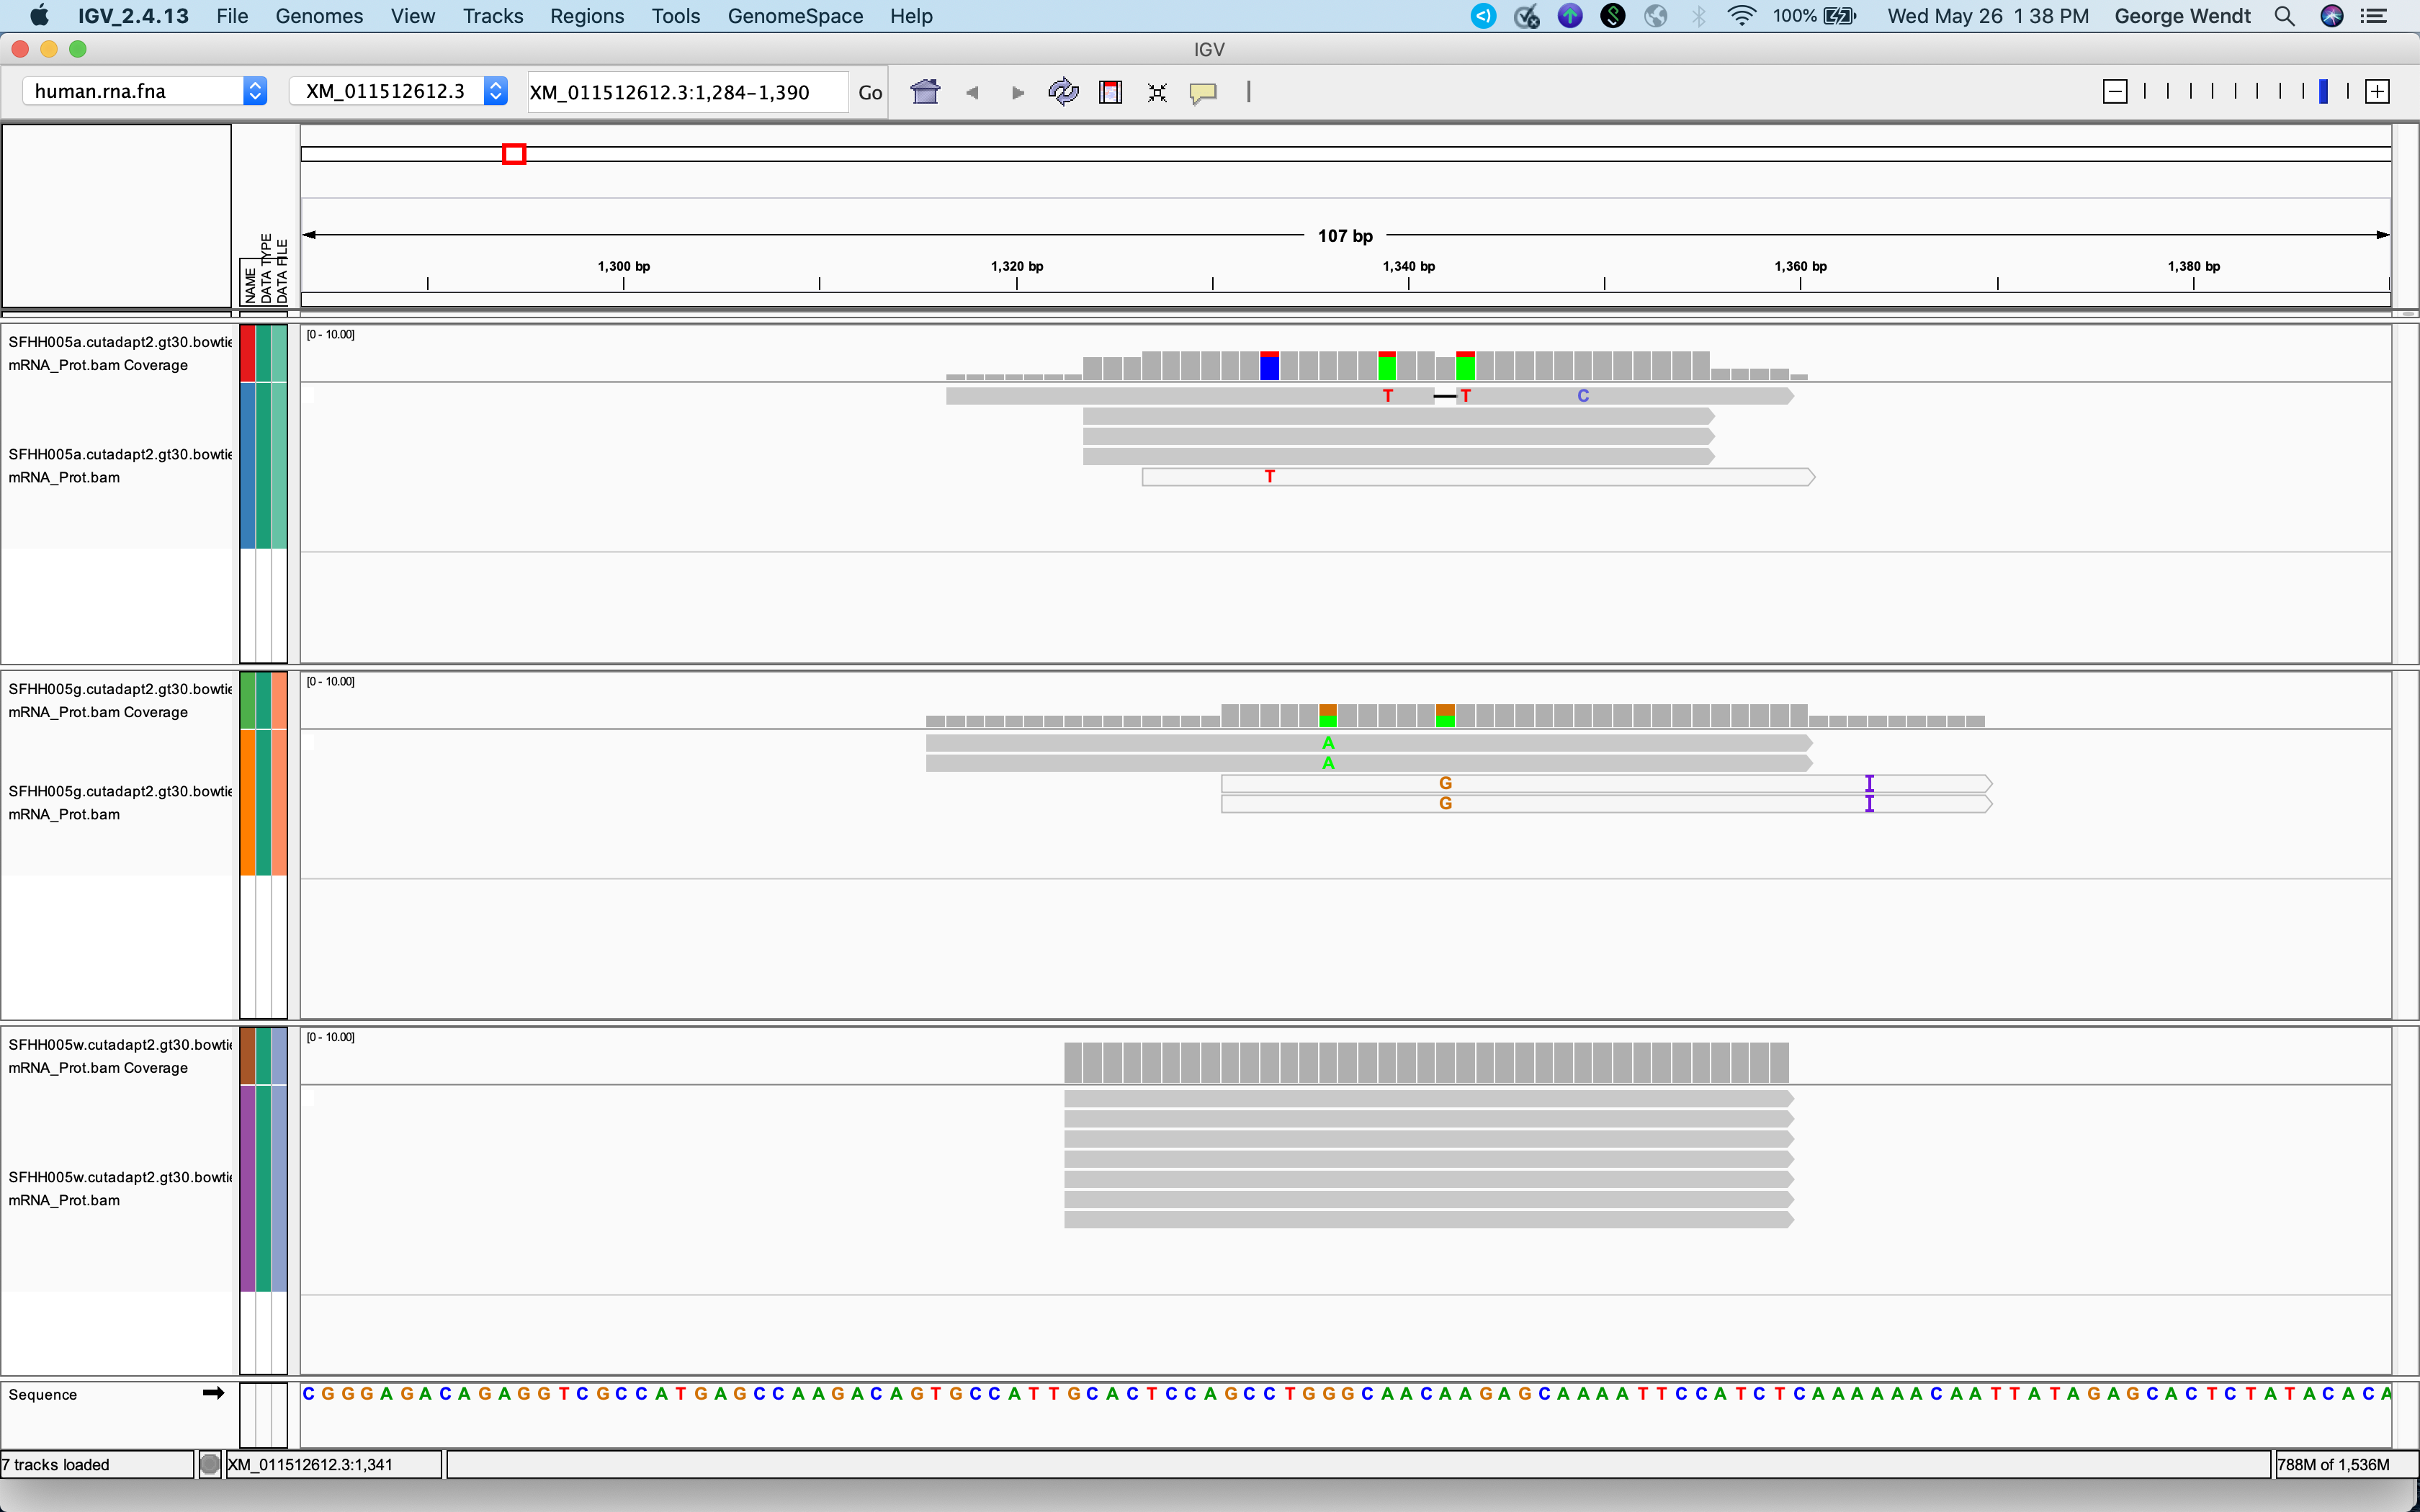

In [59]:
df.sum(axis='columns').sort_values(ascending=False).head(10)

sequence
NR_004393.1       234115
NR_002728.3       165624
NR_047469.1        66785
NR_126435.1        65790
NM_152318.3        61810
NM_001355197.2     61767
NM_152367.3        59957
NM_024813.3        55786
NR_146117.1        50362
NR_146144.1        45216
dtype: int64

In [61]:
t2g[t2g['transcript']=='NR_004393.1']

transcript  gene
4333  NR_004393.1  RNY4

In [63]:
df.loc['NR_004393.1',df.columns[df.loc['NR_004393.1'] >0]].sort_values(ascending=False).head(10)

SFHH006aq.cutadapt2    57303
SFHH006aq.bbduk2       56852
SFHH006an.cutadapt2     8519
SFHH006an.bbduk2        8454
SFHH006k.cutadapt2      5315
SFHH006k.bbduk2         5273
SFHH006aj.cutadapt2     4978
SFHH006aj.bbduk2        4925
SFHH006ae.cutadapt2     3977
SFHH006ae.bbduk2        3935
Name: NR_004393.1, dtype: int64

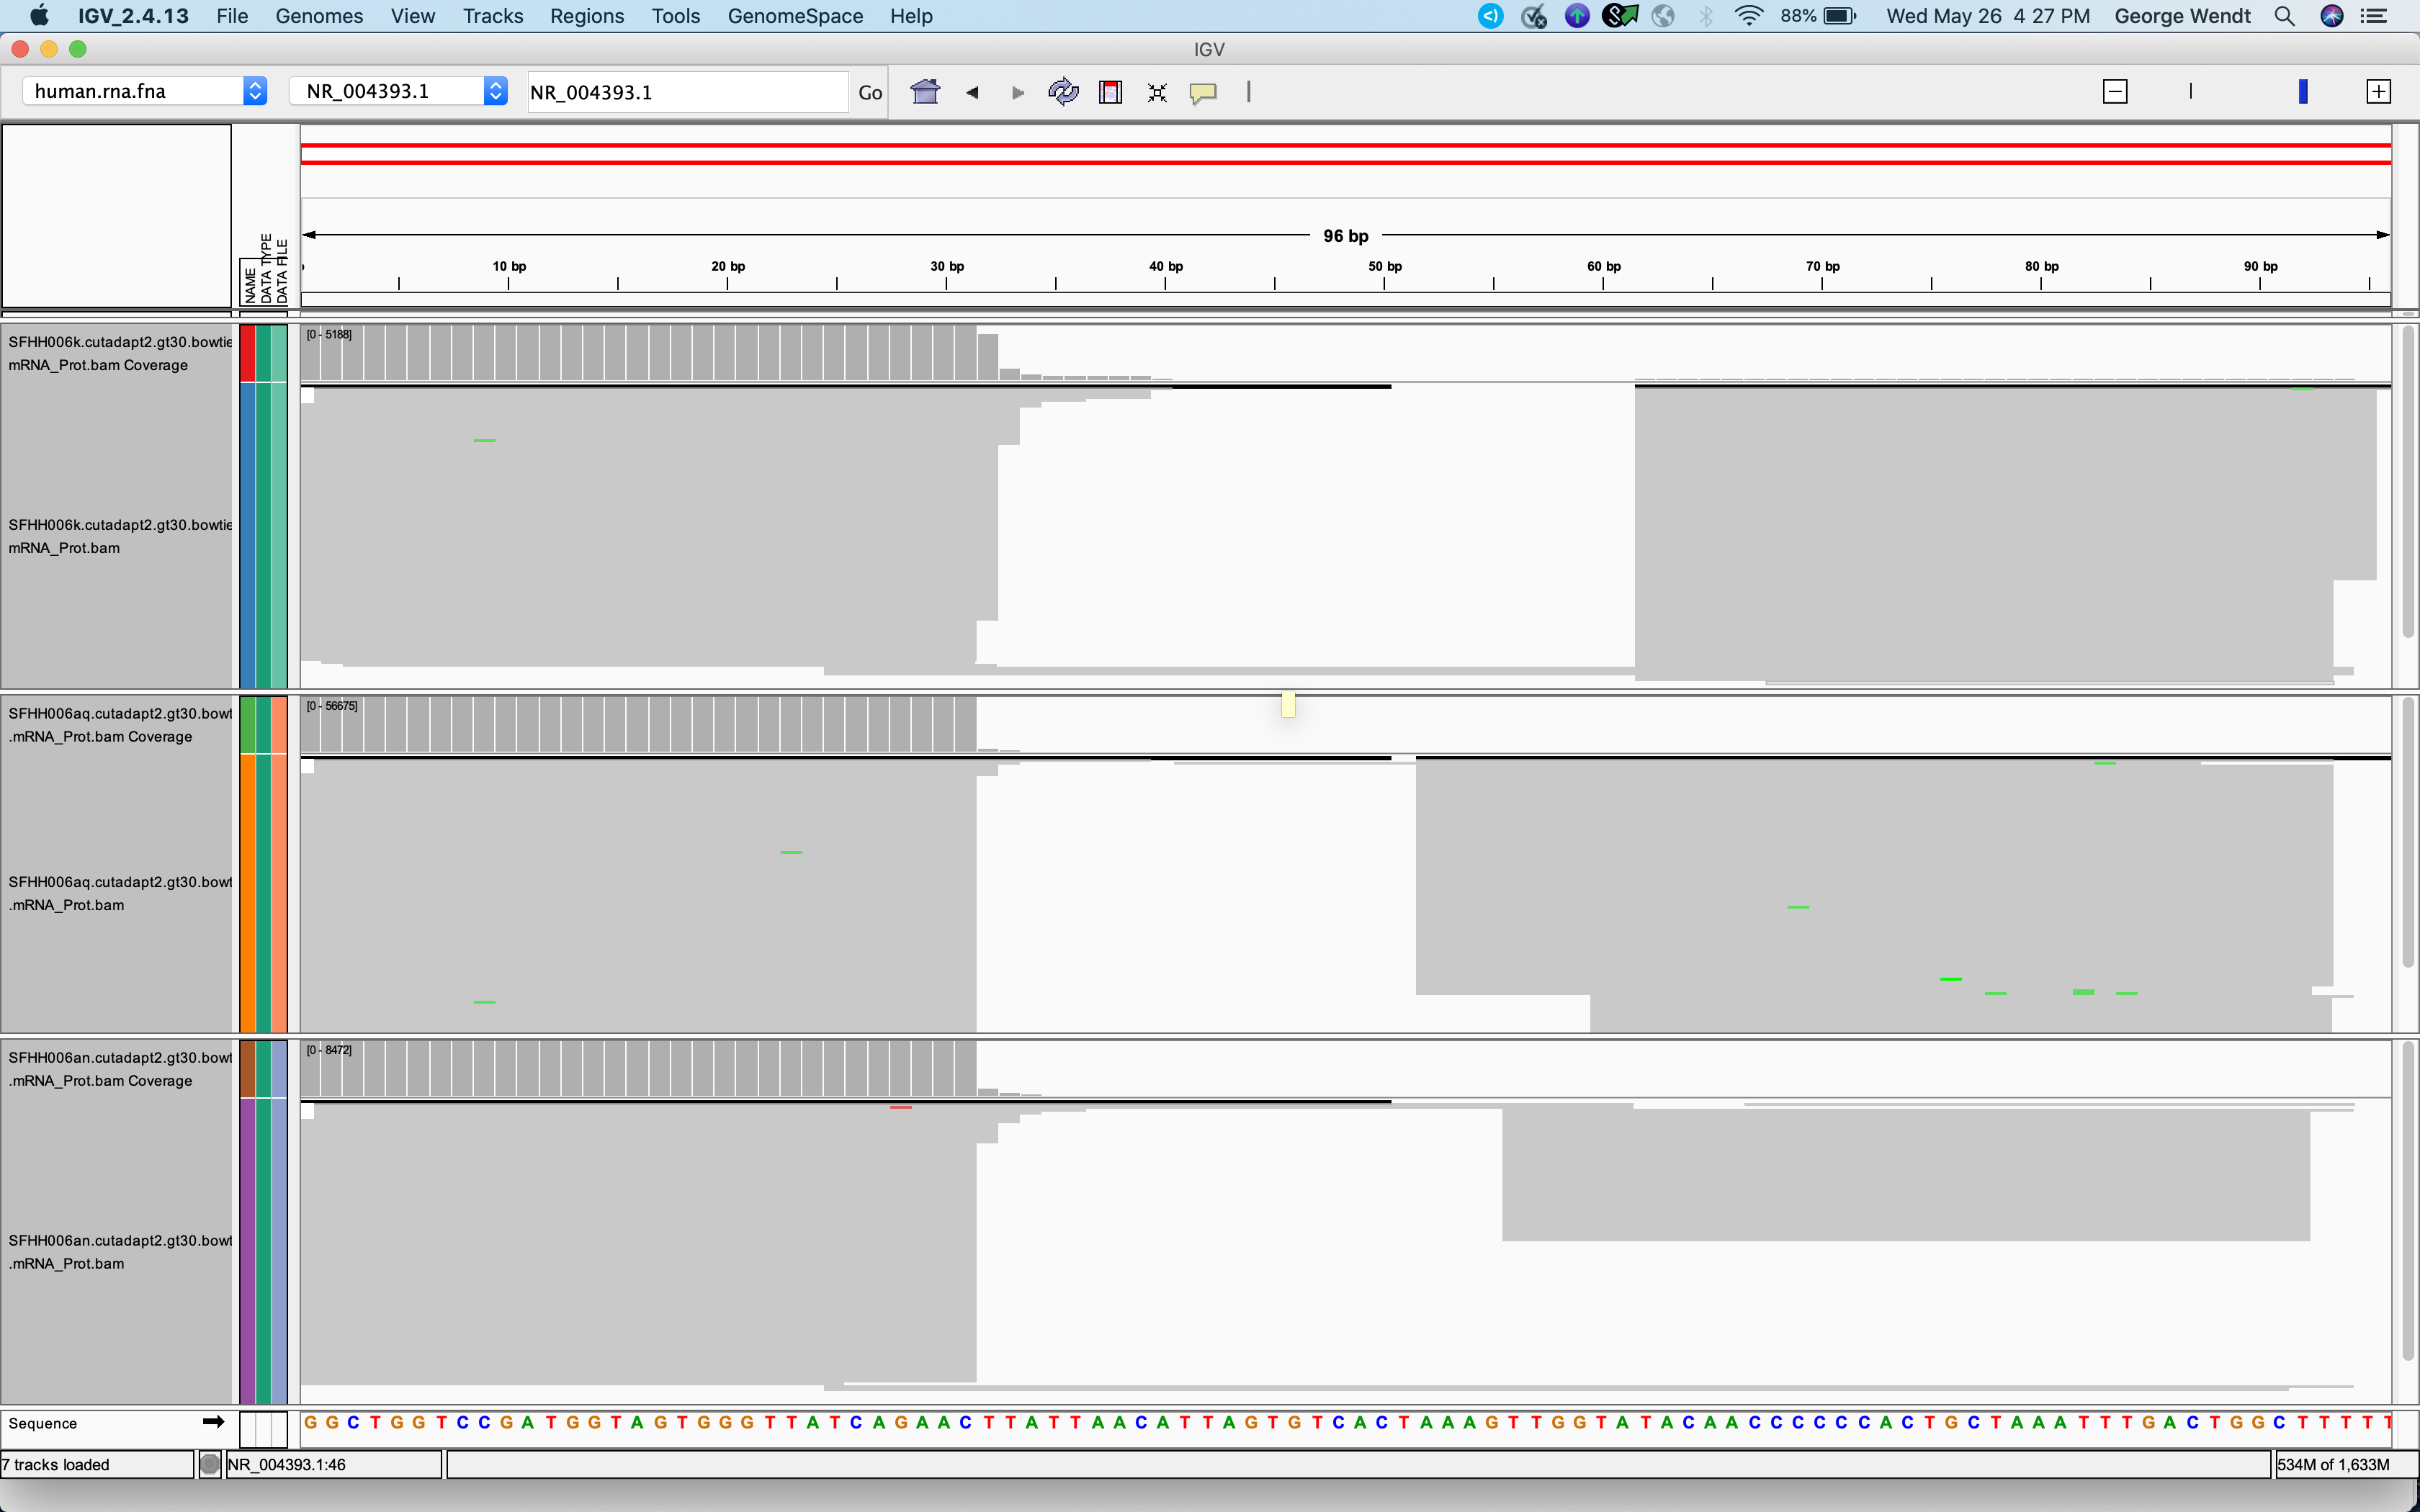

Short gene. Solid coverage on the ends, minimal in the middle.

In [64]:
t2g[t2g['transcript']=='NR_002728.3']

transcript      gene
164721  NR_002728.3  KCNQ1OT1

In [65]:
df.loc['NR_002728.3',df.columns[df.loc['NR_002728.3'] >0]].sort_values(ascending=False).head(10)

SFHH005aj.cutadapt2    15700
SFHH005g.cutadapt2     12772
SFHH005aj.bbduk2       11695
SFHH005g.bbduk2        10222
SFHH005am.cutadapt2     5524
SFHH005am.bbduk2        4414
SFHH005y.cutadapt2      4324
SFHH005z.cutadapt2      4214
SFHH005ar.cutadapt2     4074
SFHH005t.cutadapt2      3900
Name: NR_002728.3, dtype: int64

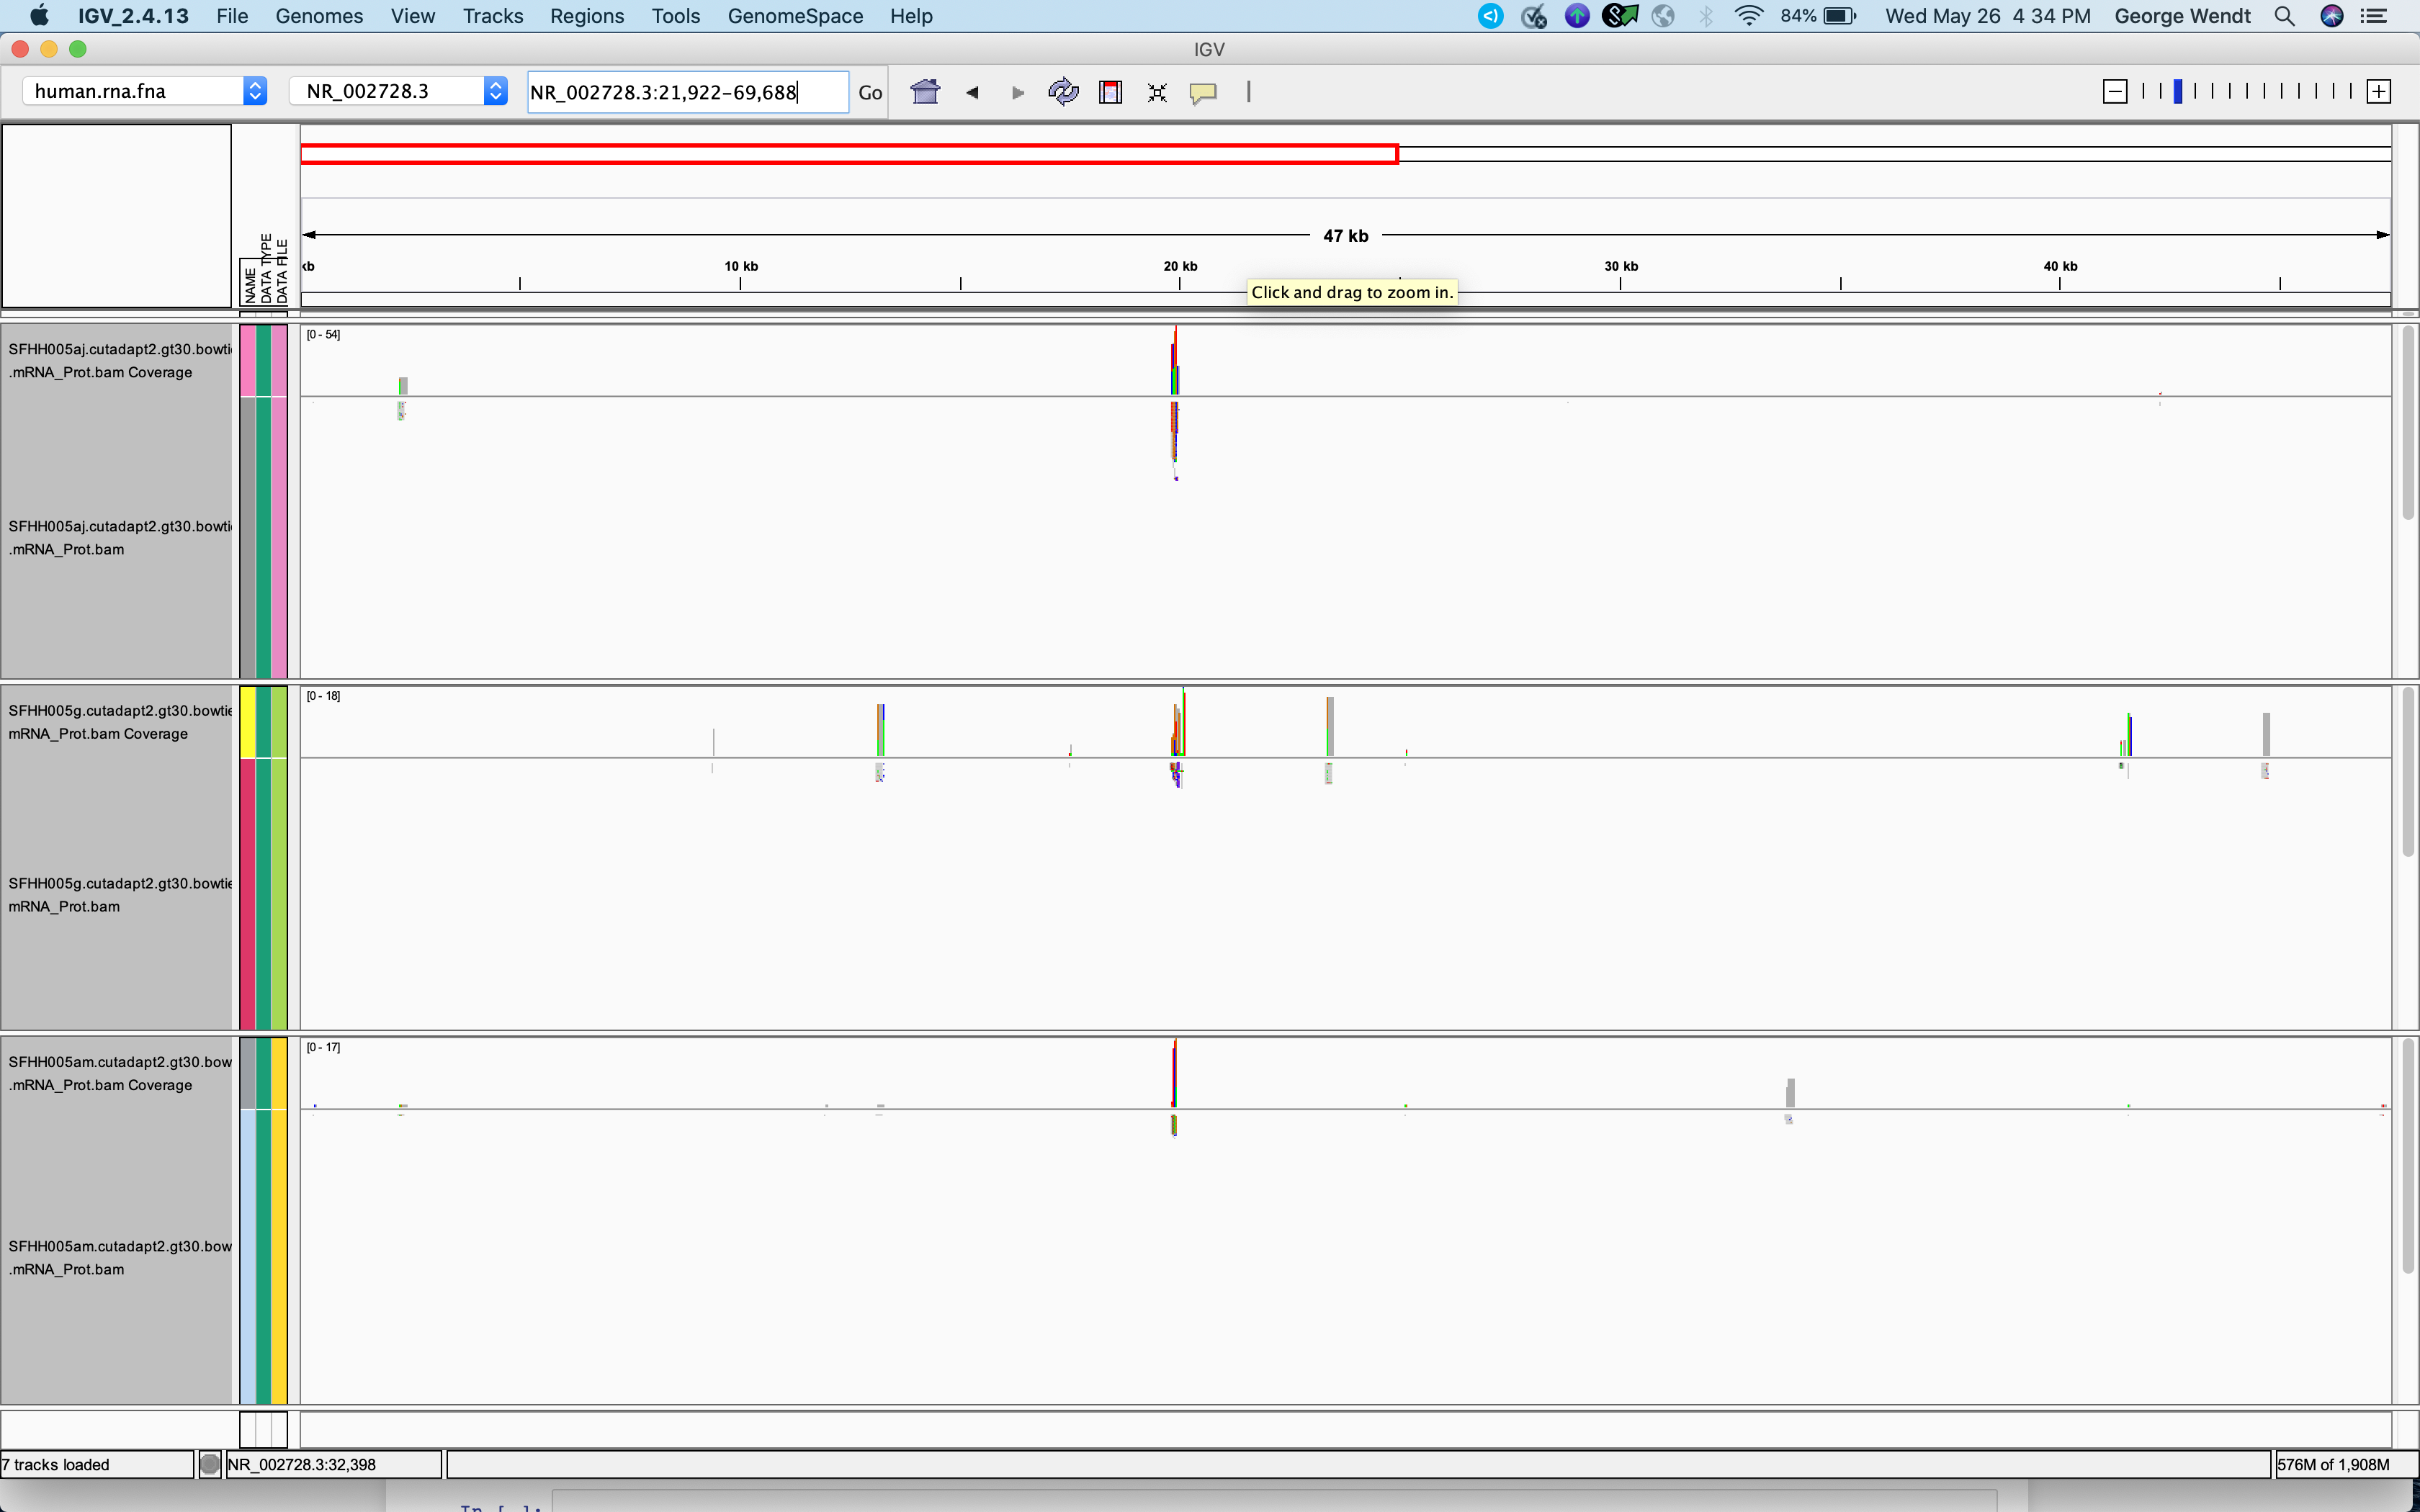

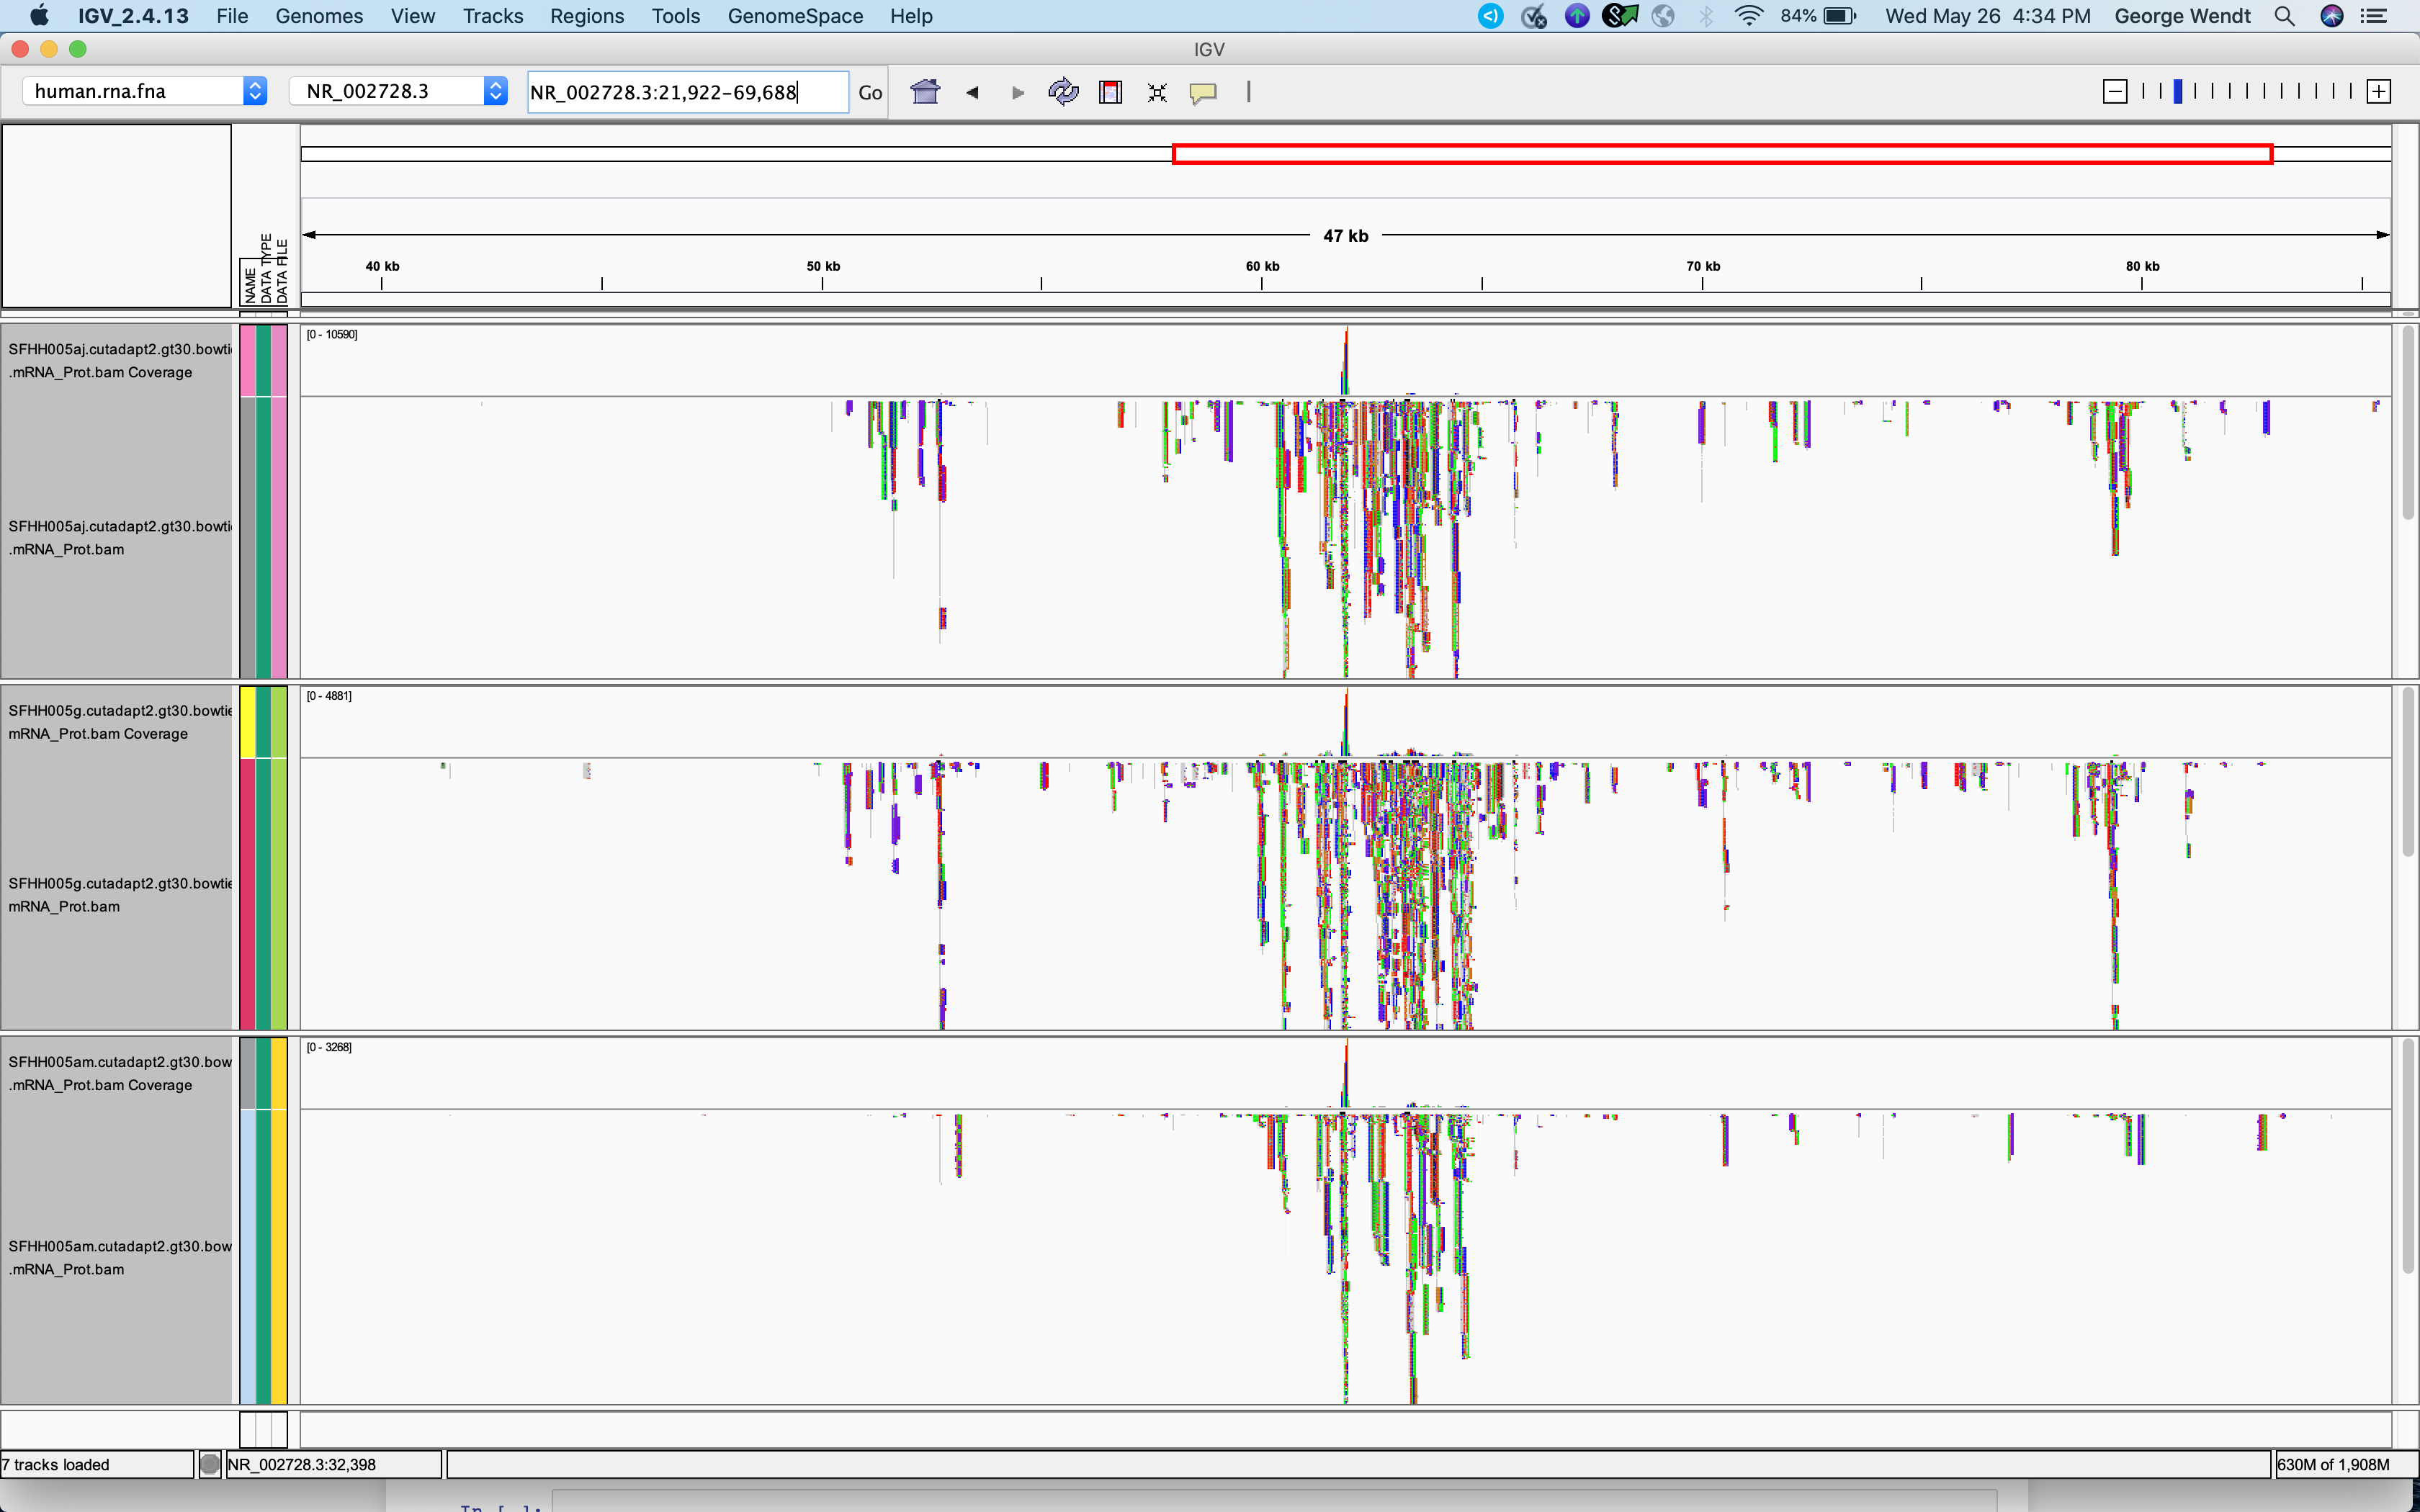

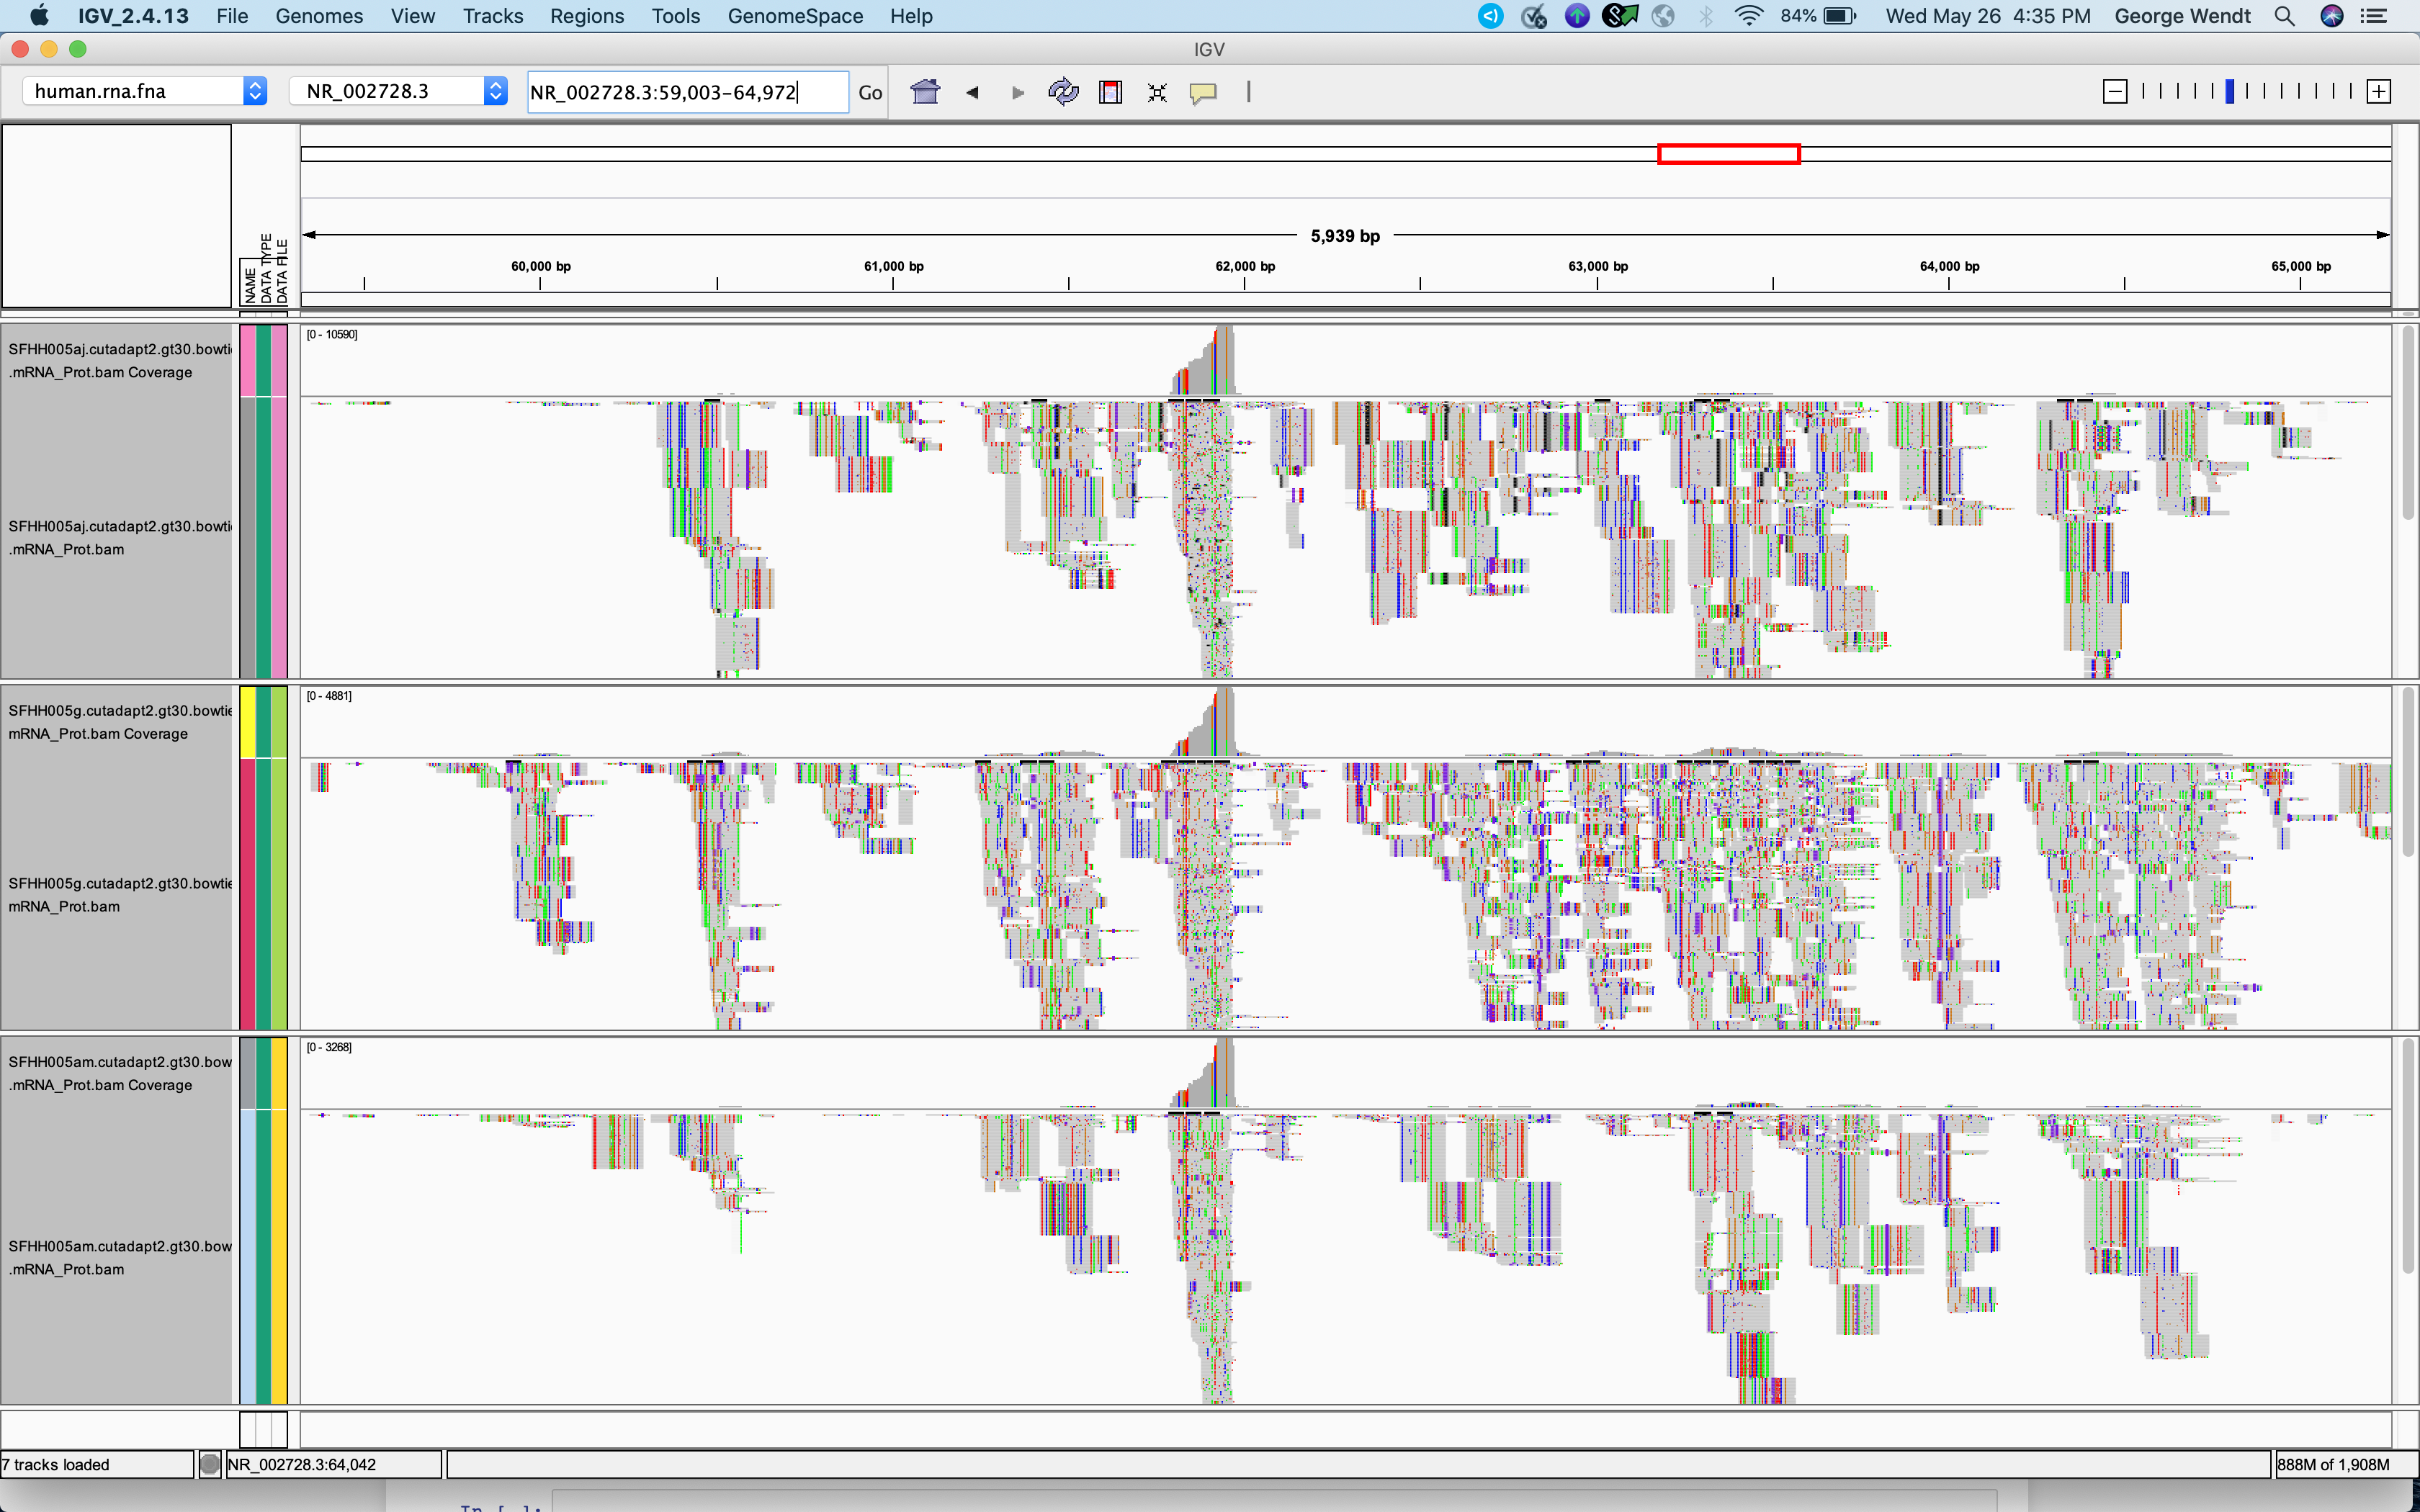

What are the genes of the top 20 transcripts?

In [75]:
df.sum(axis='columns').sort_values(ascending=False).head(20).index.tolist()

['NR_004393.1',
 'NR_002728.3',
 'NR_047469.1',
 'NR_126435.1',
 'NM_152318.3',
 'NM_001355197.2',
 'NM_152367.3',
 'NM_024813.3',
 'NR_146117.1',
 'NR_146144.1',
 'NR_146151.1',
 'NR_145819.1',
 'NR_046235.3',
 'NM_001004689.2',
 'NM_024652.6',
 'NR_034022.1',
 'NM_152400.3',
 'NM_015693.4',
 'NM_001304533.3',
 'NM_001190702.2']

In [74]:
t2g[t2g['transcript'].isin(df.sum(axis='columns').sort_values(ascending=False).head(20).index.tolist())]

transcript          gene
263        NR_145819.1      RNA45SN1
291        NR_146151.1      RNA45SN3
303        NR_146117.1      RNA45SN4
2135       NR_047469.1     LINC00506
2314       NR_034022.1  LOC100131257
4333       NR_004393.1          RNY4
6911       NR_046235.3      RNA45SN5
7796       NR_146144.1      RNA45SN2
15679      NM_152400.3       FAM241A
15852   NM_001190702.2      MTRNR2L8
15983      NM_024652.6         LRRK1
20752   NM_001004689.2         OR2M3
24069      NM_152367.3       MAB21L3
27175   NM_001355197.2         ZNF66
40614   NM_001304533.3        NKAIN3
141960     NM_015693.4          INTU
144028     NM_152318.3      NOPCHAP1
144922     NM_024813.3         RPAP2
164671     NR_126435.1     LINC00504
164721     NR_002728.3      KCNQ1OT1